# Cómo funciona un perceptrón
En model_perceptron_byhand.ipynb programamos un perceptron "a mano" para entender que pasa por dentro de una red neuronal.
Entender esto, nos deja en mejor forma para entender modelos mas complejos de redes neuronales.

In [47]:
# Primero vamos a crear una data artificial
import numpy as np
from sklearn import datasets


# Aqui creamos un set de 150 instancias con 2 features, y una variable clase "y". La gracia de este set de datos simulados es que
# lo hacemos de tal forma que las instancias correspondan a dos cluster bien definidos.
X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=5, random_state=2)

#print(X)
print(y)

[1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0
 1 1]


Text(0.5, 1.0, 'Problema de clasificacion simulado')

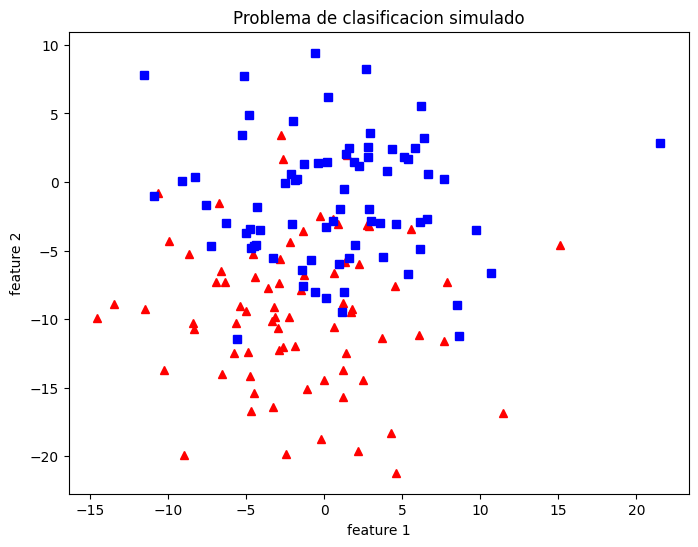

In [48]:
# Grafiquemos las instancias en el plano cartesiano, ya que tenemos solo 2 features.

import matplotlib.pyplot as plt #cargamos paquete para graficar

fig = plt.figure(figsize=(8,6))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Problema de clasificacion simulado')



In [3]:
# definamos nuestra función de activacion, que es simplemente como:
# g(z) = 1 si z>=0, g(z) = 0 si z<0,
# Es decir, equivale a una función escalón.

def step_func(z):
 return 1.0 if (z > 0) else 0.0

#### Regla de entrenamiento del perceptrón

El apredizaje significa operacionalmente, el uptdating de los pesos sinápticos (conexiones de la entrada a la neurona). Para un peso de la i-ésima entrada:

$$ w_i ← w_i + \alpha (t - o)x_i$$

donde
* $\alpha$ dijimos que es la tasa de aprendizaje
* $t$ es el target o valor objetivo
* $o$ es la salida del perceptron (+1 activado o 0 apagado)
* $x_i$ es el valor de la entrada

In [5]:
# ahora definamos el perceptron y una función para el aprendizaje:
# recordemos que los pesos se actualizan de acuerdo a la regla:

# theta_j = theta_j + \nu(y_i - h_theta(x_i))*x_i     donde theta son los pesos, y es la output, y x es la entrada.

def perceptron(X, y, lr, epochs):
    # X --> features de entrada.
    # y --> variable clase (0 o 1).
    # lr --> learning rate.
    # epochs --> numero de iteraciones.
    # m-> numero de instancias de entrenamiento  # n-> numero de features
    m, n = X.shape

    # Inicializacion de parametros theta (pesos sinapticos) a cero. # +1 en n+1 para bias bias.
    theta = np.zeros((n+1,1))

    # Lista vacia para contar cuantas instancias estan mal clasificadas en cada iteracion.
    n_miss_list = []

    # Entreanamiento.
    for epoch in range(epochs):
        # variable a almacenar #misclassified.
        n_miss = 0
        # looping para cada instancia.
        for idx, x_i in enumerate(X):   # enumerate da The *count* of the current iteration & *value* of the item at the current iteration
            # Insertar  1 para el bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)  # fabrica una columna nueva con puros 1s para el bias.
            # aqui calculamos el output. Notar que la funcion es un escalon (step)
            y_hat = step_func(np.dot(x_i.T, theta))
            # Updating  si la instancia queda mal clasificada.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)  # LA REGLA DE ENTRENAMIENTO!
                # incremento por 1 de los missclassified
                n_miss += 1
        # anexamos el numero de malclasificados en cada iteracion
        n_miss_list.append(n_miss)
    return theta, n_miss_list


In [6]:
# Y ademas vamos a definir una funcion para graficar el decision boundary.

def plot_decision_boundary(X, theta):
    # X --> features de entrada.
    # theta --> parametros pesos.
    # decision boundary es y=mx+c
    # Igualamos mx+c = theta0.X0 + theta1.X1 + theta2.X2 # al resolver encontramos la pendiente m y la constante c.
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    # Plotting
    fig = plt.figure(figsize=(4,3))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron')
    plt.plot(x1, x2, 'y-')


#### Vayamos viendo cómo evoluciona el Decision Boundary

Utilicemos $\alpha = 0.05$

Tasa de mal clasificados es: 0.373


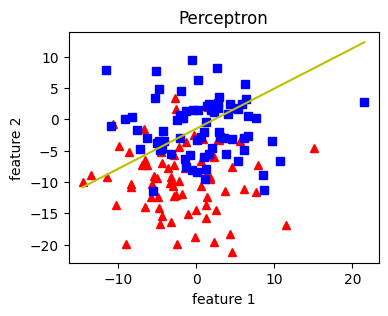

In [70]:
# Con 1 epoch
m = X.shape[0]
theta, miss_l = perceptron(X, y, 0.5, 1)
plot_decision_boundary(X, theta)
print(f"Tasa de mal clasificados es: {miss_l[len(miss_l)-1 ] / m:.3f}")

Tasa de mal clasificados es: 0.300


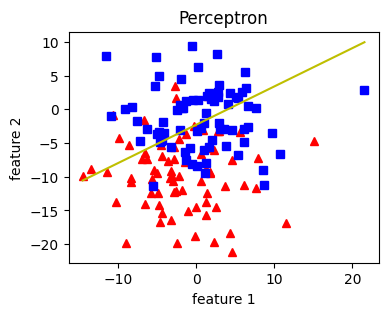

In [71]:
# Con 5 epochs
theta, miss_l = perceptron(X, y, 0.5, 5)
plot_decision_boundary(X, theta)
print(f"Tasa de mal clasificados es: {miss_l[len(miss_l)-1 ] / m:.3f}")

Tasa de mal clasificados es: 0.313


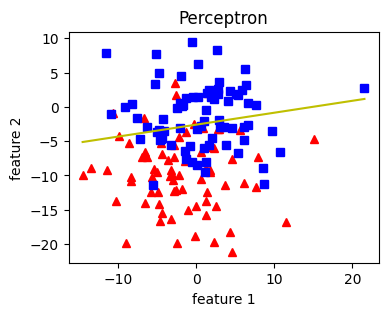

In [72]:
# Con 10 epochs

theta, miss_l = perceptron(X, y, 0.5, 10)
plot_decision_boundary(X, theta)
print(f"Tasa de mal clasificados es: {miss_l[len(miss_l)-1 ] / m:.3f}")

Tasa de mal clasificados es: 0.267


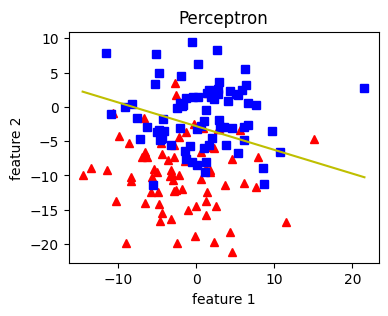

In [73]:
# Con 100 epochs

theta, miss_l = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, theta)
print(f"Tasa de mal clasificados es: {miss_l[len(miss_l)-1 ] / m:.3f}")

In [53]:
# veamos los pesos:

print(theta)   # contante o bias, w1 y w2.

[[1.65      ]
 [0.20246652]
 [0.58544854]]


#### Tarea

1. Modifique la primera parte de la generación de muestras sintéticas, para que ambos clusters queden solapados (averigue en Internet cómo hacerlo). Luego vuelva a correr entrenar el perceptrón con los nuevo datos. Grafique el decision boundary. Explique qué sucede.
2. Modifique la función 'perceptron' para que además vaya almacenando la función de pérdida en cada iteración.
3. Para los más computines. Modifique la función para que vaya registrando la evolución de los parámetros a lo largo de las iteraciones.

In [ ]:
#print(np.zeros((3,1)))
#print(theta)
b = enumerate(X)
print(b)

In [ ]:
import pandas as pd
df = pd.DataFrame(columns = ['theta0', 'theta1', 'theta2'])

for idx, x_i in enumerate(X):
    #print(idx)
    #print(x_i)
    #xx_i = np.insert(x_i, 0, 1)     # formato [ 1.         -0.53278301 -1.64847081]
    #print(xx_i)
    xx_i = np.insert(x_i, 0, 1).reshape(-1,1) # formato [[ 1.        ] [-0.53278301] [-1.64847081]]   (convertimos el array de shape (150,3) en 150 bloques de )
    #print(xx_i)
    y_hat = step_func(np.dot(xx_i.T, theta))
    #print(y_hat)
    #print(np.squeeze(y_hat) - y[idx])
    if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*xx_i)
    #print(theta)
    #print(theta[1])
    df = df.append({'theta0' : float(theta[0]), 'theta1' : float(theta[1]), 'theta2' : float(theta[2]) }, ignore_index = True)

print(df)
#type(float( theta[1]))



     theta0    theta1    theta2
0       0.5 -0.266392 -0.824235
1       0.0  0.008722  4.984072
2       0.5  0.703033  4.266169
3       1.0  1.388203  3.946059
4       1.0  1.388203  3.946059
..      ...       ...       ...
145     5.0  0.744298  0.846922
146     5.0  0.744298  0.846922
147     5.0  0.744298  0.846922
148     5.0  0.744298  0.846922
149     5.0  0.744298  0.846922

[150 rows x 3 columns]


In [ ]:
n_list = list(range(1, 151))
df['iter'] = n_list
print(df)

     theta0    theta1    theta2  iter
0       0.5 -0.266392 -0.824235     1
1       0.0  0.008722  4.984072     2
2       0.5  0.703033  4.266169     3
3       1.0  1.388203  3.946059     4
4       1.0  1.388203  3.946059     5
..      ...       ...       ...   ...
145     5.0  0.744298  0.846922   146
146     5.0  0.744298  0.846922   147
147     5.0  0.744298  0.846922   148
148     5.0  0.744298  0.846922   149
149     5.0  0.744298  0.846922   150

[150 rows x 4 columns]


<AxesSubplot:xlabel='iter'>

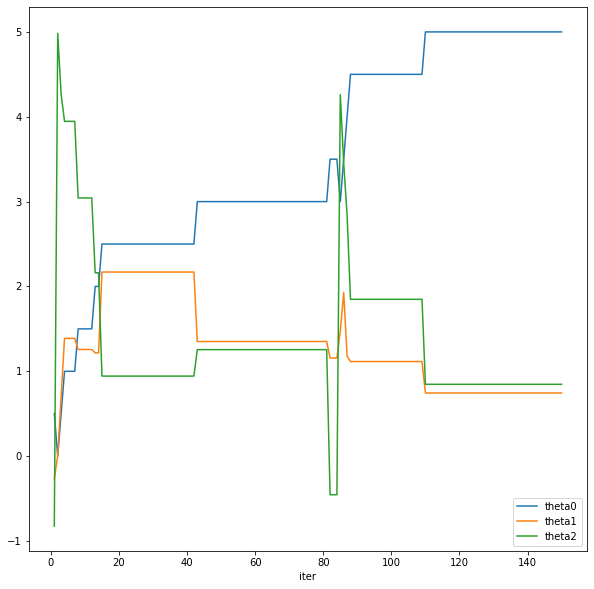

In [ ]:
# grafiquemos la evolucion de los pesos

import matplotlib.pyplot as plt


df.plot(x="iter" , y=["theta0", "theta1", "theta2"], kind="line", figsize=(10, 10))



In [ ]:
#type(theta)  # numpy.ndarray
#theta.ndim  #2
#theta.shape # (3, 1)
print(theta[2])



[0.84692166]
